### Plotting with folium

__What is Folium?__

It's a Python wrapper for a tool called leaflet.js. We basically give it minimal instructions, JS does loads of work in the background and we get some very, very cool maps. It's great stuff.

Let's take a look at how we'd implement these using both GeoPandas and Folium:

In [118]:
# Importing Libraries
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [119]:
df1 = pd.read_csv('volcano_data_2010.csv')
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
Year         63 non-null int64
Name         63 non-null object
Country      63 non-null object
Latitude     63 non-null float64
Longitude    63 non-null float64
Type         63 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ KB


In [120]:
geometry = gpd.GeoSeries([Point(x,y) for x, y in zip(df['Longitude'], df['Latitude'])])
geo_df = gpd.GeoDataFrame(df[['Year','Name','Country', 'Latitude', 'Longitude', 'Type']], geometry=geometry)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44199999999999 -1.467)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62 63.63)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.601 14.381)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78 16.708)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48 2.78)


In [121]:
world = gpd.read_file('zip://data/ne_110m_admin_0_countries.zip')

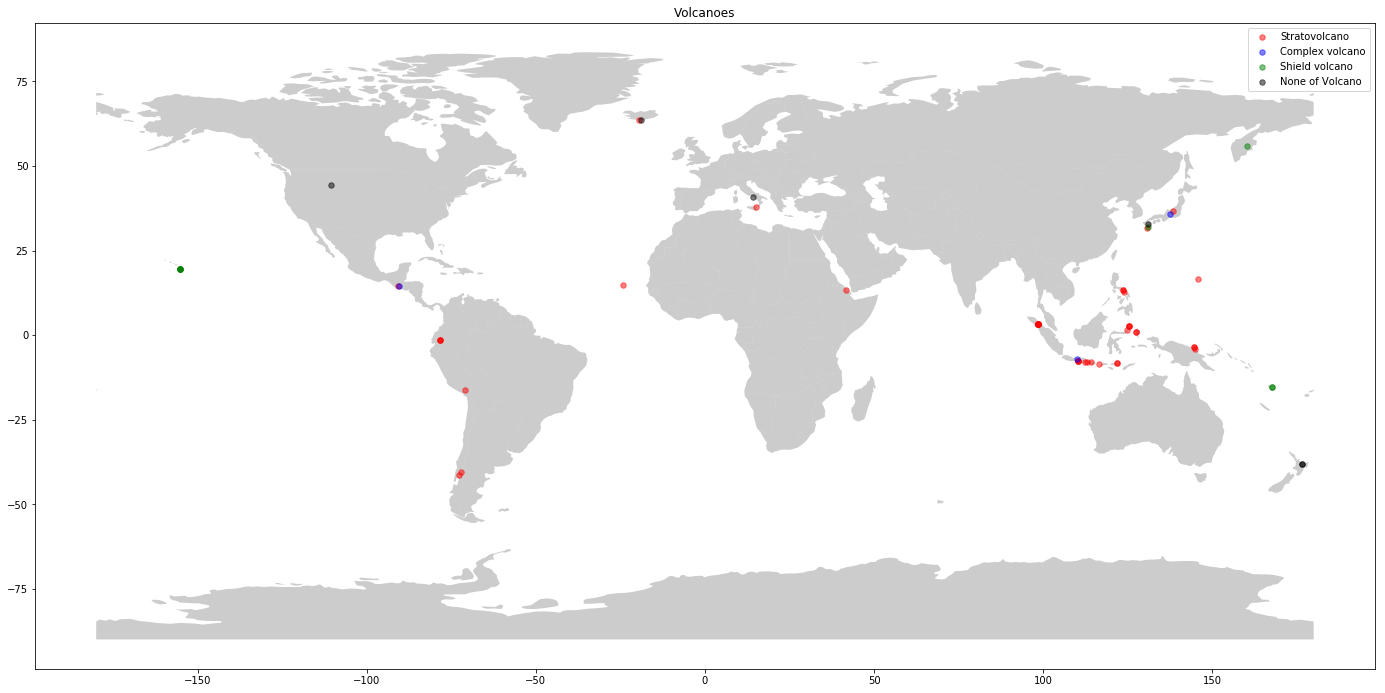

In [122]:
fig, ax = plt.subplots(figsize = (24,18))
world.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['Type'] == 'Stratovolcano'].geometry.plot(color = 'red', ax = ax, label = 'Stratovolcano', alpha = .5, markersize = 30)
geo_df[geo_df['Type'] == 'Complex volcano'].geometry.plot(color = 'blue', ax = ax, label = 'Complex volcano', alpha = .5, markersize = 30)
geo_df[geo_df['Type'] == 'Shield volcano'].geometry.plot(color = 'green', ax = ax, label = 'Shield volcano', alpha = .5, markersize = 30)
geo_df[(geo_df['Type'] != 'Stratovolcano') & (geo_df['Type'] != 'Complex volcano') & (geo_df['Type'] != 'Shield volcano')].geometry.plot(color = 'black', ax = ax, label = 'None of Volcano', alpha = .5, markersize = 30)
plt.title('Volcanoes')
plt.legend()

We will be using different icons to differentiate the types of Volcanoes using Folium.

In [132]:
#use terrain map layer to actually see volcano terrain
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)

In [133]:
# insert multiple markers, iterate through list
# add a different color marker associated with type of volcano

df_ll = df.loc[:, ("Latitude", "Longitude")]
df_ll_list = df_ll.values.tolist()

i = 0
for coordinates in df_ll_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    else:
        type_color = "black"


    #now place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(geo_df.Year[i]) + '<br>' +
                            "Name: " + str(geo_df.Name[i]) + '<br>' +
                            "Country: " + str(geo_df.Country[i]) + '<br>'
                            "Type: " + str(geo_df.Type[i]) + '<br>'
                            "Coordinates: " + str(df_ll_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1

In [134]:
map